# Data preparation

Imports and definitions

In [1]:
import pandas as pd
import numpy as np
import glob, os
from datetime import timedelta
import matplotlib.pyplot as plt
import statsmodels.api as sm

from src.utils import read_sleep_file

plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams['figure.dpi']

#from src.utils import read_sleep_file
PWD = os.getcwd()
print(PWD)
DATA_DIR = 'data'
FILE_TYPE = '*' #'ENHANCED_TENTATIVE'
FILES_DIR = os.path.join(PWD, DATA_DIR, 'sleep_data')
print(FILES_DIR)
SLEEP_DATA_COLS = ['calendar_date', 'local_start_time', 'local_end_time', 
                      'duration_in_seconds', 'awake_time', 'deep_sleep_time', 
                      'rem_sleep_time'] 
DATE_COLS = ['calendar_date', 'local_start_time', 'local_end_time']

OUTPUT_FILE = os.path.join(PWD, 'out', 'sleep_out_.csv')

C:\Users\Garzon\Documents\Projects\DigBio
C:\Users\Garzon\Documents\Projects\DigBio\data\sleep_data


Read files

In [2]:
os.chdir(FILES_DIR)

files = glob.glob(f'*{FILE_TYPE}*.csv')
#print(files)

sleep_data = pd.concat([ read_sleep_file(file) for file in files] )

sleep_data = sleep_data[SLEEP_DATA_COLS]
print(sleep_data.shape)
print(sleep_data.head())

print(sleep_data.dtypes)

(43, 7)
  calendar_date     local_start_time       local_end_time  \
0    2022-04-06  2022-04-05 23:22:00  2022-04-06 06:29:00   
0    2022-04-07  2022-04-06 22:14:00  2022-04-07 07:33:00   
0    2022-04-08  2022-04-08 03:31:00  2022-04-08 08:48:00   
0    2022-04-09  2022-04-08 22:33:00  2022-04-09 07:23:00   
0    2022-04-10  2022-04-09 23:31:00  2022-04-10 06:44:00   

   duration_in_seconds  awake_time  deep_sleep_time  rem_sleep_time  
0                25620          60             3780            7380  
0                33540           0             4200            6660  
0                19020         300             4800            4440  
0                31800         120             5040            7380  
0                25980         420             4140            6180  
calendar_date          object
local_start_time       object
local_end_time         object
duration_in_seconds     int64
awake_time              int64
deep_sleep_time         int64
rem_sleep_time          i

Create new variables

In [3]:
sleep_data['total_sleep_hours'] = sleep_data['duration_in_seconds']/(60*60)
sleep_data['deep_sleep_percentage'] = sleep_data['deep_sleep_time']/sleep_data['duration_in_seconds']
sleep_data['rem_sleep_percentage'] = sleep_data['rem_sleep_time']/sleep_data['duration_in_seconds']
sleep_data['awake_percentage'] = sleep_data['awake_time']/sleep_data['duration_in_seconds']
sleep_data[DATE_COLS] = sleep_data[DATE_COLS].apply(pd.to_datetime, axis=1)
sleep_data['calendar_date'] = sleep_data['calendar_date'] - timedelta(days=1)

sleep_data['local_start_time_seconds'] = sleep_data['local_start_time'].apply(lambda x: pd.Timestamp(x).timestamp())
sleep_data['local_end_time_seconds'] = sleep_data['local_end_time'].apply(lambda x: pd.Timestamp(x).timestamp()) - 200

sleep_data['total_sleep_hours_round'] = sleep_data['total_sleep_hours'].apply(np.floor)

print(sleep_data.head())

sleep_data = sleep_data.sort_values(by=['calendar_date'])

sleep_data.to_csv(OUTPUT_FILE, sep =';')

  calendar_date    local_start_time      local_end_time  duration_in_seconds  \
0    2022-04-05 2022-04-05 23:22:00 2022-04-06 06:29:00                25620   
0    2022-04-06 2022-04-06 22:14:00 2022-04-07 07:33:00                33540   
0    2022-04-07 2022-04-08 03:31:00 2022-04-08 08:48:00                19020   
0    2022-04-08 2022-04-08 22:33:00 2022-04-09 07:23:00                31800   
0    2022-04-09 2022-04-09 23:31:00 2022-04-10 06:44:00                25980   

   awake_time  deep_sleep_time  rem_sleep_time  total_sleep_hours  \
0          60             3780            7380           7.116667   
0           0             4200            6660           9.316667   
0         300             4800            4440           5.283333   
0         120             5040            7380           8.833333   
0         420             4140            6180           7.216667   

   deep_sleep_percentage  rem_sleep_percentage  awake_percentage  \
0               0.147541            

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Garzon\\Documents\\Projects\\DigBio\\out\\sleep_out_.csv'

Creat a histogram of total hours

<AxesSubplot:>

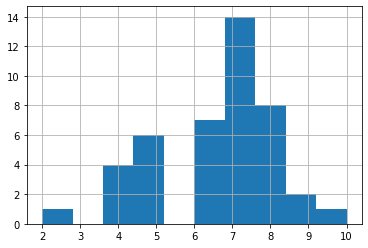

In [4]:
sleep_data['total_sleep_hours_round'].hist()

Plot sleep hours over time

<AxesSubplot:xlabel='calendar_date'>

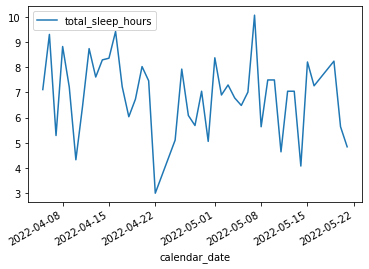

In [5]:
sleep_data.plot('calendar_date', 'total_sleep_hours')

Fit linear regression model

In [6]:
x = sleep_data['calendar_date'].apply(lambda x: pd.Timestamp(x).timestamp()).values
X = (x - x.mean())/x.std()
X = sm.add_constant(X)
y = sleep_data['total_sleep_hours'].values

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.418
Date:                Fri, 16 Sep 2022   Prob (F-statistic):              0.241
Time:                        16:10:50   Log-Likelihood:                -78.262
No. Observations:                  43   AIC:                             160.5
Df Residuals:                      41   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9058      0.233     29.608      0.0